In [ ]:
# https://freakonometrics.hypotheses.org/18117
# Bayesian approch

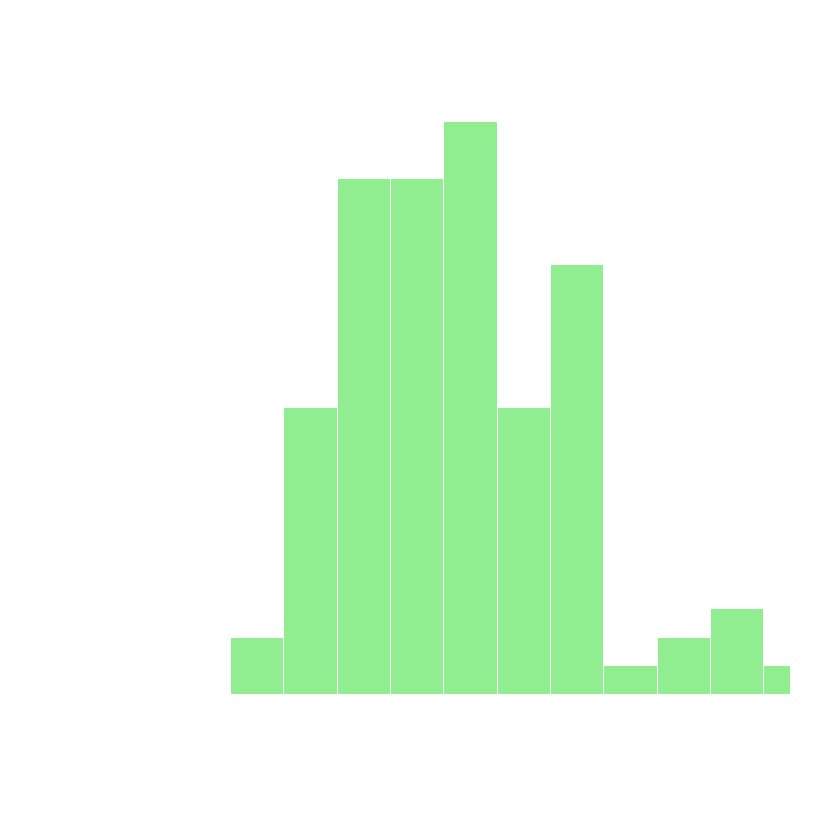

In [69]:
set.seed(2020)
xbar <- 159
n <- 1047
ns <- 100
M <- matrix(rbinom(n * ns, size = 1, prob = xbar/n), nrow = n)

pk <- rbeta(ns, 1 + xbar, 1 + n - xbar)
hist(pk, prob = TRUE, col = "light green", border = "white",
     axes = FALSE, main = "", xlab = "", ylab = "", lwd = 3, xlim = c(.12,.18))

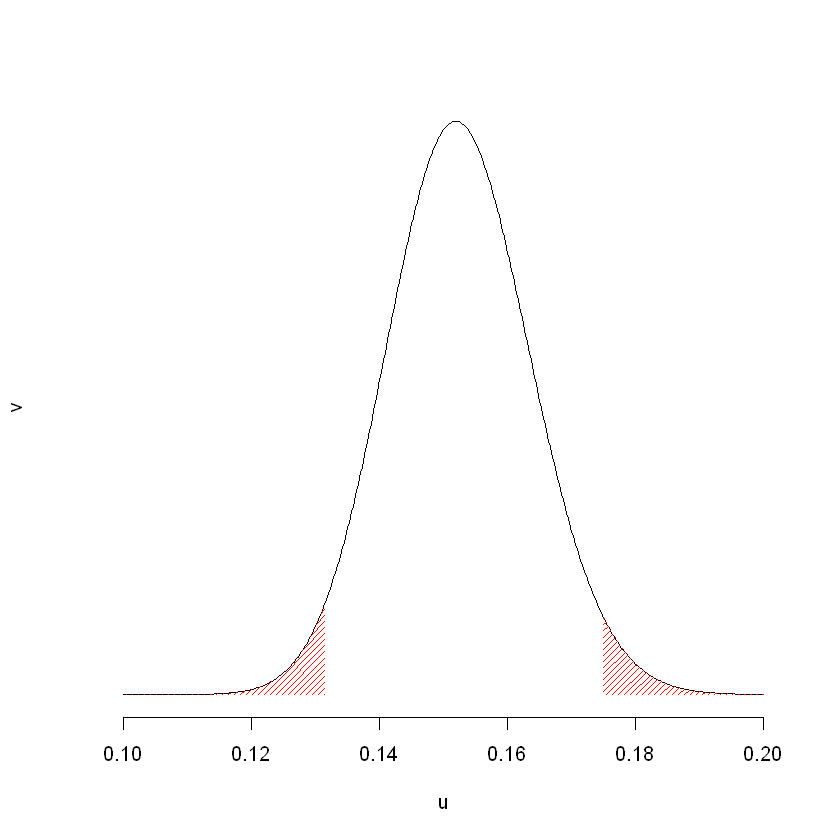

In [70]:
set.seed(2020)

u = seq(.1, .2, length = 501)
v = dbeta(u, 1 + xbar, 1 + n - xbar)
plot(u, v, axes=FALSE, type="l")
I = u < qbeta(.025, 1 + xbar, 1 + n - xbar)
polygon(c(u[I], rev(u[I])), c(v[I], rep(0,sum(I))), col="red", density = 30, border = NA)
I = u > qbeta(.975, 1 + xbar, 1 + n - xbar)
polygon(c(u[I], rev(u[I])), c(v[I], rep(0,sum(I))), col="red", density = 30, border = NA)
axis(1)

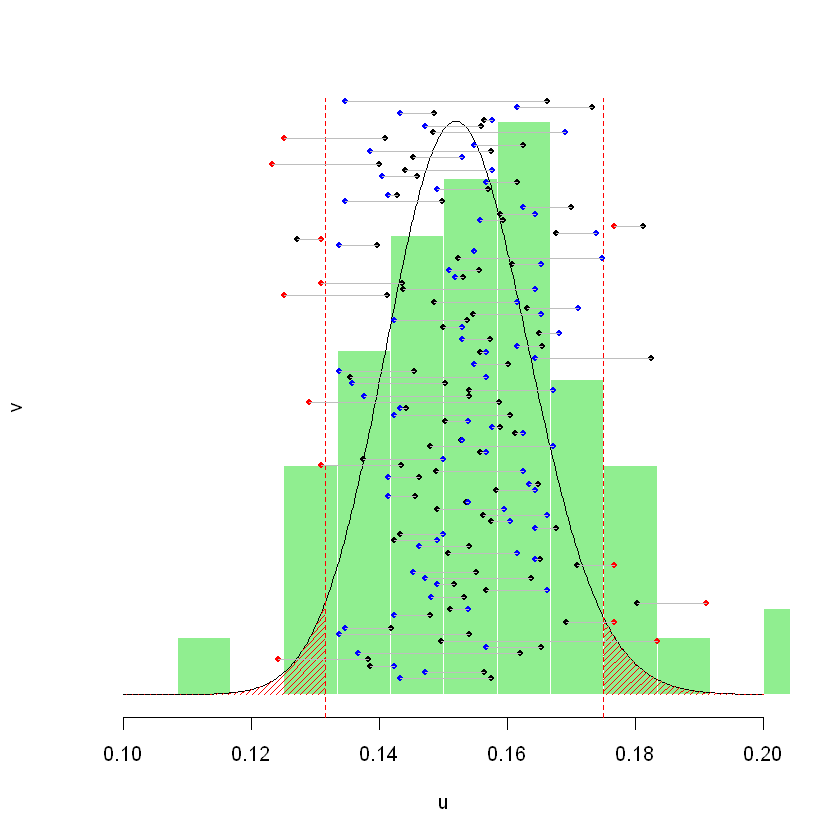

In [75]:
set.seed(2020)

pk <- rbeta(ns, 1 + xbar, 1 + n - xbar)
hist(pk, prob = TRUE, col = "light green", border = "white",
     axes = FALSE, main = "", xlab = "", ylab = "", lwd = 3, xlim = c(.12,.18))

par(new = TRUE)

u = seq(.1, .2, length = 501)
v = dbeta(u, 1 + xbar, 1 + n - xbar)
plot(u, v, axes=FALSE, type="l")
I = u < qbeta(.025, 1 + xbar, 1 + n - xbar)
polygon(c(u[I], rev(u[I])), c(v[I], rep(0,sum(I))), col="red", density = 30, border = NA)
I = u > qbeta(.975, 1 + xbar, 1 + n - xbar)
polygon(c(u[I], rev(u[I])), c(v[I], rep(0,sum(I))), col="red", density = 30, border = NA)
axis(1)

# bate prior 95% 
M = matrix(rbinom(n * ns, size = 1, prob = rep(pk, each = n)), nrow = n)
MN = apply(M, 2, mean)

abline(v = qbeta(c(.025,.975), 1 + xbar, 1 + n - xbar), col = "red", lty = 2)
points(pk, seq(1, 40, length = ns), pch = 19, cex = .7)
k = ((MN < qbeta(.025, 1 + xbar, 1 + n - xbar)) | (MN > qbeta(.975, 1 + xbar, 1 + n - xbar)))
points(MN, seq(1, 40, length = ns), pch = 19, cex = .7, col = c("blue","red")[1 + k])
segments(MN, seq(1, 40, length = ns), pk, seq(1, 40, length = ns), col="grey")